# Scaler - Clustering

#### **Problem Statement**

To cluster the data provided on the basis of job profile , company and other details . The main focus is to profile the best company and the job position offered.

#### **DataSet**

We have a dataset related to a segment of learners provided by Scaler.

The dataset has the following columns:
* **‘Unnamed 0’** - Index of the dataset
* **Email_hash** - Anonymised Personal Identifiable Information (PII)
* **Company_hash** - This represents an anonymized identifier for the company, which is the current employer of the learner.
* **orgyear** - Employment start date
* **CTC** - Current CTC
* **Job_position** - Job profile in the company
* **CTC_updated_year** - Year in which CTC got updated (Yearly increments, Promotions)

In [ ]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 1ZWw8QS5gsbUJLUXKR2eAfNRspMhtlw_r

Downloading...
From: https://drive.google.com/uc?id=1ZWw8QS5gsbUJLUXKR2eAfNRspMhtlw_r
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 29.5MB/s]


In [ ]:
df = pd.read_csv('scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


## **EDA**

#### Dimension of the dataset

In [ ]:
df.shape

(205843, 7)

* We have 7 columns and around 2 lakh rows in the dataset given

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [ ]:
df.nunique()

,0
Unnamed: 0,205843
company_hash,37299
email_hash,153443
orgyear,77
ctc,3360
job_position,1016
ctc_updated_year,7


* There are 37,299 different companies
* 1,53,443 different email hash which interprets the no.of learners

In [ ]:
df['company_hash'].value_counts()

,count
company_hash,
nvnv wgzohrnvzwj otqcxwto,8337
xzegojo,5381
vbvkgz,3481
zgn vuurxwvmrt vwwghzn,3411
wgszxkvzn,3240
...,...
onvqmhwpo,1
bvsxw ogenfvqt uqxcvnt rxbxnta,1
agsbv ojontbo,1


In [ ]:
df['ctc'].value_counts()

,count
ctc,
600000,7832
400000,7598
1000000,7581
500000,7242
800000,6752
...,...
1916000,1
5340000,1
2305000,1


#### Checking for null values

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


Data contains null values in 3 columns **[company_hash, orgyear, job_position]**.

We can remove the column Unnamed:0 as its only index and is not required for further analysis

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

#### Checking for Duplicates

In [ ]:
df.duplicated().sum()

34

##### Checking for duplicates by column

In [ ]:
df.duplicated(subset=['email_hash']).sum()

52400

In [ ]:
df.duplicated(subset=['email_hash']).value_counts()

,count
False,153443
True,52400


### Feature Engineering

In [ ]:
df['email_hash'].value_counts().head()

,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,8


* Here we observe that there are multiple entries agaist the same email id, Lets check the data wrt to one of the above email hash

In [ ]:
df[df['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
9857,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,QA Engineer,2020.0
10002,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Devops Engineer,2020.0
10583,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Backend Engineer,2020.0
12784,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Other,2020.0
20715,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,SDET,2020.0
138253,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,SDET,2020.0
159251,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Devops Engineer,2020.0
165343,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Other,2020.0
178749,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Backend Engineer,2020.0


* Aparently for the same identification and at the same year of joining and company there exists multiple ctc and job_positions , This may not be possible so lets consider the last in this case

In [ ]:
data = df.groupby('email_hash').last().reset_index()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   email_hash        153443 non-null  object 
 1   company_hash      153411 non-null  object 
 2   orgyear           153365 non-null  float64
 3   ctc               153443 non-null  int64  
 4   job_position      133218 non-null  object 
 5   ctc_updated_year  153443 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.0+ MB


In [ ]:
data['company_hash'].isna().sum()

32

In [ ]:
#imputing for na in company hash column
data['company_hash'] = data['company_hash'].fillna('Not Available').apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x).title()))

In [ ]:
data.isna().sum()

,0
email_hash,0
company_hash,0
orgyear,78
ctc,0
job_position,20225
ctc_updated_year,0


In [ ]:
data['orgyear'].value_counts()

,count
orgyear,
2016.0,17329
2018.0,16818
2017.0,16561
2015.0,15988
2019.0,15033
...,...
1900.0,1
1979.0,1
2106.0,1


* From the data we can see some irregular years which might be preset due to typing mistake or wrong entry , we'll consider them as outliers and remove
* We'll consider the years above 1900 and definitely the organization joining year can't be a future year so we consider within 2025

In [ ]:
data['orgyear'].astype(float)
data_f = data[(data['orgyear'] > 1900) & (data['orgyear'] < 2025)]

In [ ]:
data['ctc_updated_year'].value_counts()

,count
ctc_updated_year,
2019.0,57720
2021.0,37645
2020.0,36466
2017.0,7185
2018.0,6633
2016.0,5133
2015.0,2661


In [ ]:
data_f.isna().sum()

,0
email_hash,0
company_hash,0
orgyear,0
ctc,0
job_position,20186
ctc_updated_year,0


In [ ]:
data_f['job_position'].value_counts()

,count
job_position,
Backend Engineer,37081
FullStack Engineer,20429
Other,15781
Frontend Engineer,9261
Engineering Leadership,6274
...,...
Associate Product Manager,1
Core Tech Engineer / Researcher,1
Backend Engineering,1


In [ ]:
#Fixing CTC values
def fun(row):
  if(row["ctc"]<300000):
    if(2024.0-row["orgyear"]>=4):
      return int(str(row["ctc"])[:2])*10**5
    else:
      return int(str(row["ctc"])[:1])*10**5
  else:
    return row["ctc"]

data_f["ctc"]=data_f.apply(fun,axis=1)

In [ ]:
#Treating outliers in ctc
percentile_95=data_f["ctc"].quantile(0.95)
percentile_95

4700000.0

In [ ]:
#Need to apply log on ctc
data_f["ctc"]=np.where(data_f["ctc"]>percentile_95,percentile_95,data_f["ctc"])

In [ ]:
# Impute for the missing values in job position
data_f['job_position'] = data_f['job_position'].fillna('Not Available').apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x).title()))

* For EDA we are imputing the job_positions column with not availabe later we'll perform knn imputation on this column

In [ ]:
unique_job_positions = df['job_position'].unique().tolist()
unique_job_positions

['Other',
 'FullStack Engineer',
 'Backend Engineer',
 nan,
 'iOS Engineer',
 'Data Analyst',
 'Frontend Engineer',
 'QA Engineer',
 'Engineering Leadership',
 'Data Scientist',
 'Engineering Intern',
 'Android Engineer',
 'Research Engineers',
 'Fullstack Engineer',
 'SDET',
 'Support Engineer',
 'Security Leadership',
 'Devops Engineer',
 'Product Manager',
 'Program Manager',
 'Co-founder',
 'Member of Technical Staff 3',
 'Product Designer',
 'System Engineer',
 'Backend Architect',
 'Database Administrator',
 'Senior  Software Engineer',
 'Release Engineer',
 'ASE',
 'Non Coder',
 'Trainer',
 'Associate Consultant',
 'Administrator',
 'Software Development Engineer 2',
 'Sr.',
 'Sr. EXECUTIVE ',
 'Software Engineer (Android)',
 'Owner',
 'Tool room Engineer, Mechanical Engineer ',
 'Senior Data Scientist',
 'SDE 2',
 'Project Engineer',
 'MEAN Stack Developer',
 'Software Development Engineer - I',
 'SDE-3',
 'Digital Marketing',
 'App Developer',
 'Principal consultant',
 'Busine

In [ ]:
def clean_title(title):
    # Remove numbers and special characters (except spaces)
    cleaned_title = re.sub(r'[^a-zA-Z\s]','', title).strip()
    # Replace empty strings and specific cases with 'Not available'
    if cleaned_title.lower() in ['', 'nan', 'cant reveal', 'no job', 'not employed']:
        return 'Not available'
    return cleaned_title

data_f['job_position_c'] = data_f['job_position'].astype(str).apply(clean_title)

In [ ]:
def categorize_title(title):
    if 'data' in title.lower():
        return 'Data Science'
    elif 'developer' in title.lower() or 'engineer' in title.lower():
        return 'Web Development'
    elif 'manager' in title.lower() or 'lead' in title.lower():
        return 'Management'
    elif 'analyst' in title.lower() or 'consultant' in title.lower():
        return 'Analysis & Consulting'
    elif 'professor' in title.lower() or 'teaching' in title.lower():
        return 'Education'
    else:
        return 'Other'

data_f['Job_Category'] = data_f['job_position_c'].apply(categorize_title)

In [ ]:
#Checking for null values post grouping
data_f.isna().sum()

,0
email_hash,0
company_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0
job_position_c,0
Job_Category,0


In [ ]:
#Checking for duplicates after performing grouping as per email hash
data_f.duplicated().sum()

0

In [ ]:
#Creating a new feature YoE(Year's of Experiance)
data_f['YoE'] = 2024 - data_f['orgyear']

In [ ]:
#Removing -ve years of experiance
data_f = data_f[~(data_f['YoE']<0)]

In [ ]:
#Creating flag indicating if a person got an increment or promotion this year.
data_f['increment_flag'] = np.where(data_f['ctc_updated_year'] == data_f['orgyear'], 0, 1)

In [ ]:
#Categorizing 'CTC' into bins like 'Low', 'Average', 'High' for a more generalized view.
data_f['ctc_bin'] = pd.cut(data_f['ctc'], bins=[0,1000000,2.271685e+06, np.inf], labels=['Low', 'Average', 'High'])

In [ ]:
#Average CTC per company
data_f['avg_ctc_per_company'] = data_f.groupby('company_hash')['ctc'].transform('mean')

In [ ]:
data_f.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,job_position_c,Job_Category,YoE,increment_flag,ctc_bin,avg_ctc_per_company
0,00003288036a44374976948c327f246fdbdf0778546904...,Bxwqgogen,2012.0,3500000.0,Backend Engineer,2019.0,Backend Engineer,Web Development,12.0,1,High,2.761819e+06
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Nqsn Axsxnvr,2013.0,2500000.0,Backend Engineer,2020.0,Backend Engineer,Web Development,11.0,1,High,2.500000e+06
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,Gunhb,2021.0,1300000.0,Fullstack Engineer,2019.0,Fullstack Engineer,Web Development,3.0,1,Average,1.444248e+06
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000.0,Fullstack Engineer,2021.0,Fullstack Engineer,Web Development,20.0,1,Average,1.832727e+06
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Fvrbvqn Rvmo,2009.0,3400000.0,Not Available,2018.0,Not Available,Other,15.0,1,High,2.685367e+06


In [ ]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153294 entries, 0 to 153442
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   email_hash           153294 non-null  object  
 1   company_hash         153294 non-null  object  
 2   orgyear              153294 non-null  float64 
 3   ctc                  153294 non-null  float64 
 4   job_position         153294 non-null  object  
 5   ctc_updated_year     153294 non-null  float64 
 6   job_position_c       153294 non-null  object  
 7   Job_Category         153294 non-null  object  
 8   YoE                  153294 non-null  float64 
 9   increment_flag       153294 non-null  int64   
 10  ctc_bin              153294 non-null  category
 11  avg_ctc_per_company  153294 non-null  float64 
dtypes: category(1), float64(5), int64(1), object(5)
memory usage: 14.2+ MB


### **Data Visualization**

**CTC Distribution**

<Axes: xlabel='ctc', ylabel='Count'>

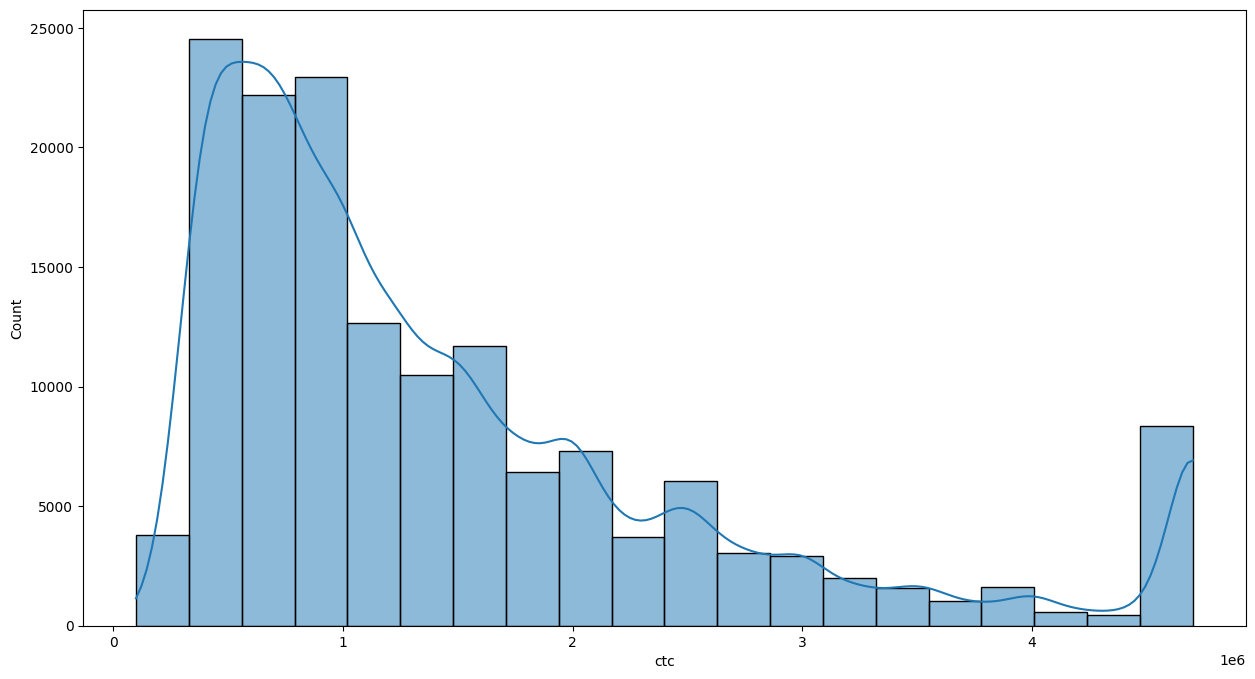

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=data_f,x='ctc',bins=20,kde=True)

* From the graph we can say that the data is left skewed
* Lets perform IQR on ctc column

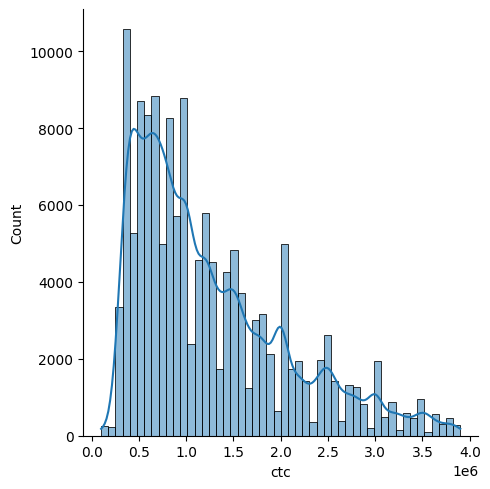

In [ ]:
# Performing IQR on CTC Column
dftmp = data_f.copy()
cols = ['ctc'] # one or more

Q1 = dftmp[cols].quantile(0.25)
Q3 = dftmp[cols].quantile(0.75)
IQR = Q3 - Q1

dftmp = dftmp[~((dftmp[cols] < (Q1 - 1.5 * IQR)) |(dftmp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
sns.displot(dftmp['ctc'],kde=True,bins=50)
plt.show()

**Distribution of Year of Experiance**

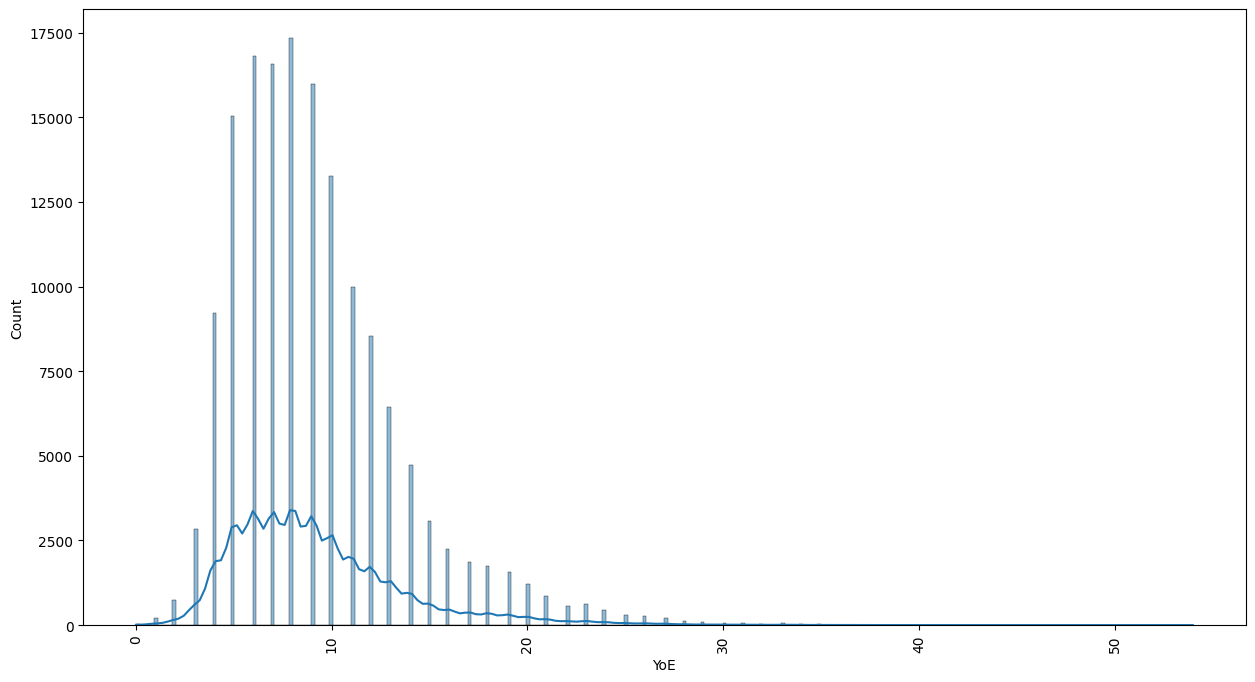

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data_f["YoE"],kde=True)
plt.xticks(rotation=90)
plt.show()

* Year of experiance is also left skewed and the highest number of learners have 9 years of experiance
* The majority of learners have an experiance of 4-12 years

**Distribution of CTC category**

<Axes: xlabel='ctc_bin', ylabel='count'>

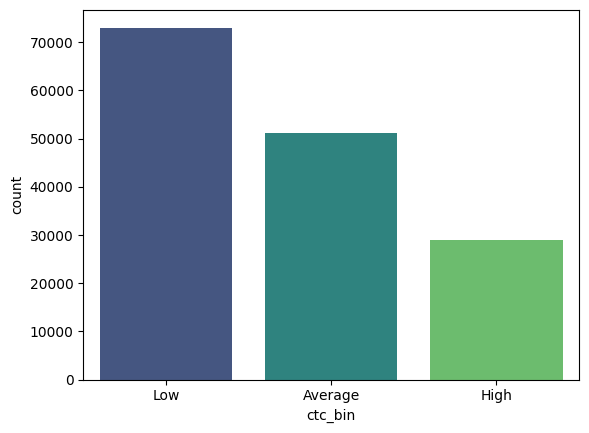

In [ ]:
sns.countplot(data=data_f,x='ctc_bin',palette='viridis')

* Majority of the learners fall into Low ctc category
* There are good no.of learners in avg category

**Avg CTC offered during joining**

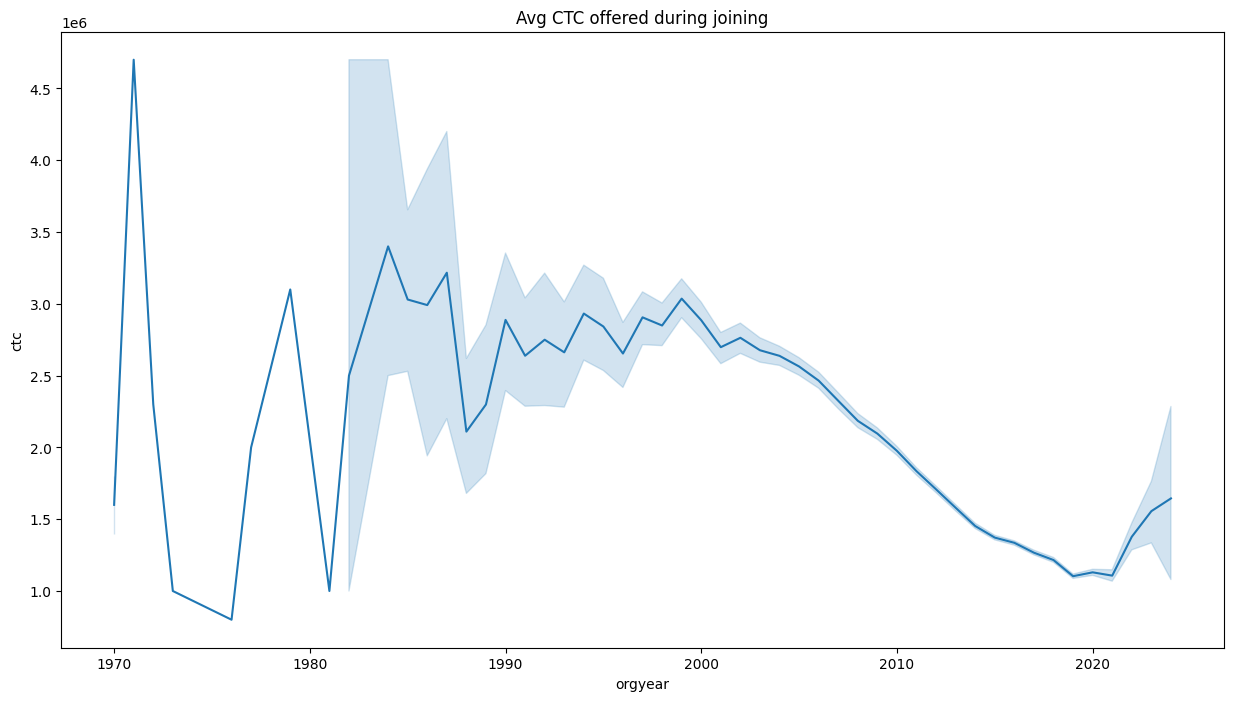

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data_f,x='orgyear',y='ctc',palette='viridis',estimator="mean")
plt.title('Avg CTC offered during joining')
plt.show()

- Between 1981 and 1983, there was a significant drop in the average CTC offered.
- From 1985 to 2004, the average CTC remained within the range of 2.5L to 3.5L.
- After 2004, the average CTC gradually declined until 2021.

**CTC v/s CTC Updated Year**

<Axes: xlabel='ctc_updated_year', ylabel='ctc'>

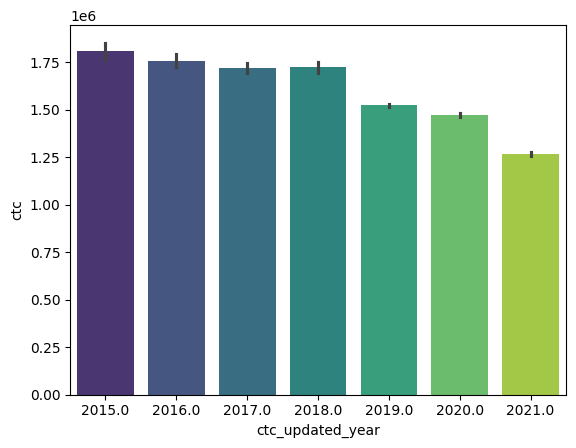

In [ ]:
sns.barplot(data=data_f,x='ctc_updated_year',y='ctc',palette='viridis')

* There is gradual drop in increments in ctc from 2015 to 2021.

<Axes: xlabel='count', ylabel='job_position'>

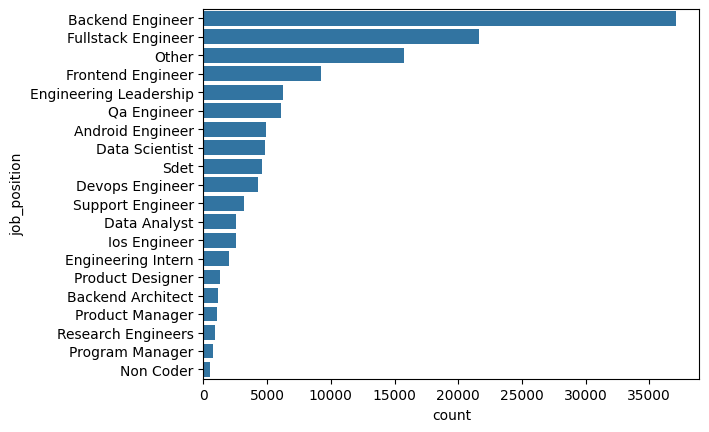

In [ ]:
b = data_f[data_f['job_position'] != 'Not Available']['job_position'].value_counts().reset_index()
b.columns = ['job_position', 'count']
sns.barplot(data=b.head(20), x='count', y='job_position')

* Highest number of learners are in Backend Engineer/Fullstack Engineer job roles.

**CTC v/s Years of Experiance**

<Axes: xlabel='YoE', ylabel='ctc'>

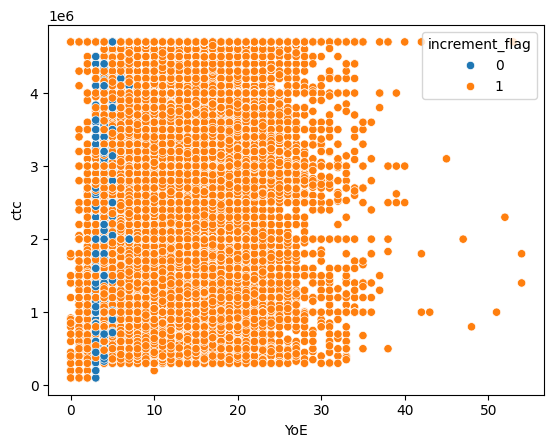

In [ ]:
sns.scatterplot(data=data_f,x='YoE',y='ctc',hue='increment_flag')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Web Development'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Data Science'),
  Text(3, 0, 'Management'),
  Text(4, 0, 'Analysis & Consulting'),
  Text(5, 0, 'Education')])

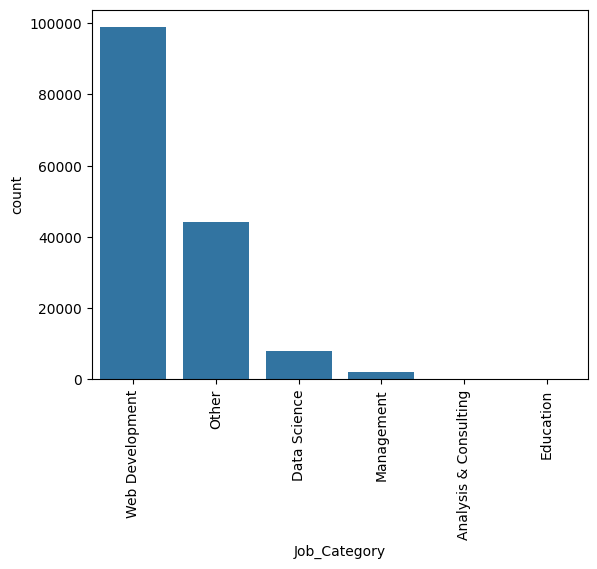

In [ ]:
sns.countplot(data=data_f,x='Job_Category')
plt.xticks(rotation=90)

* In Overall job category we see that most of the learners are into web development

**Checking the Correlation**

<Axes: >

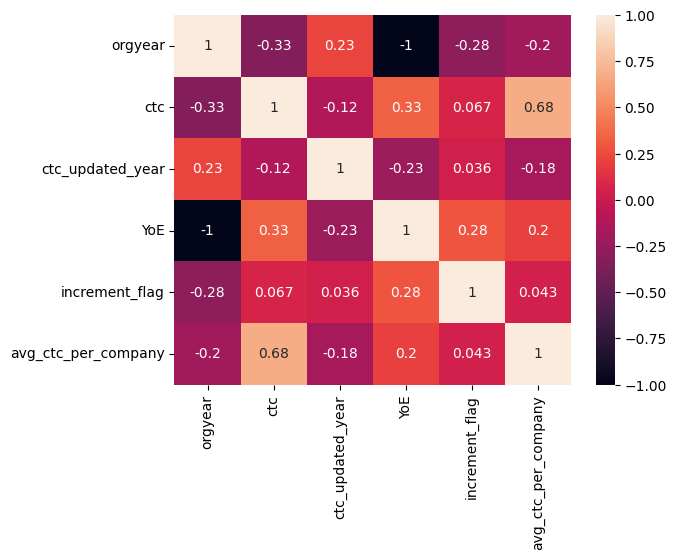

In [ ]:
sns.heatmap(data_f.select_dtypes(include='number').corr(),annot=True)

**CTC vs Year of joining**

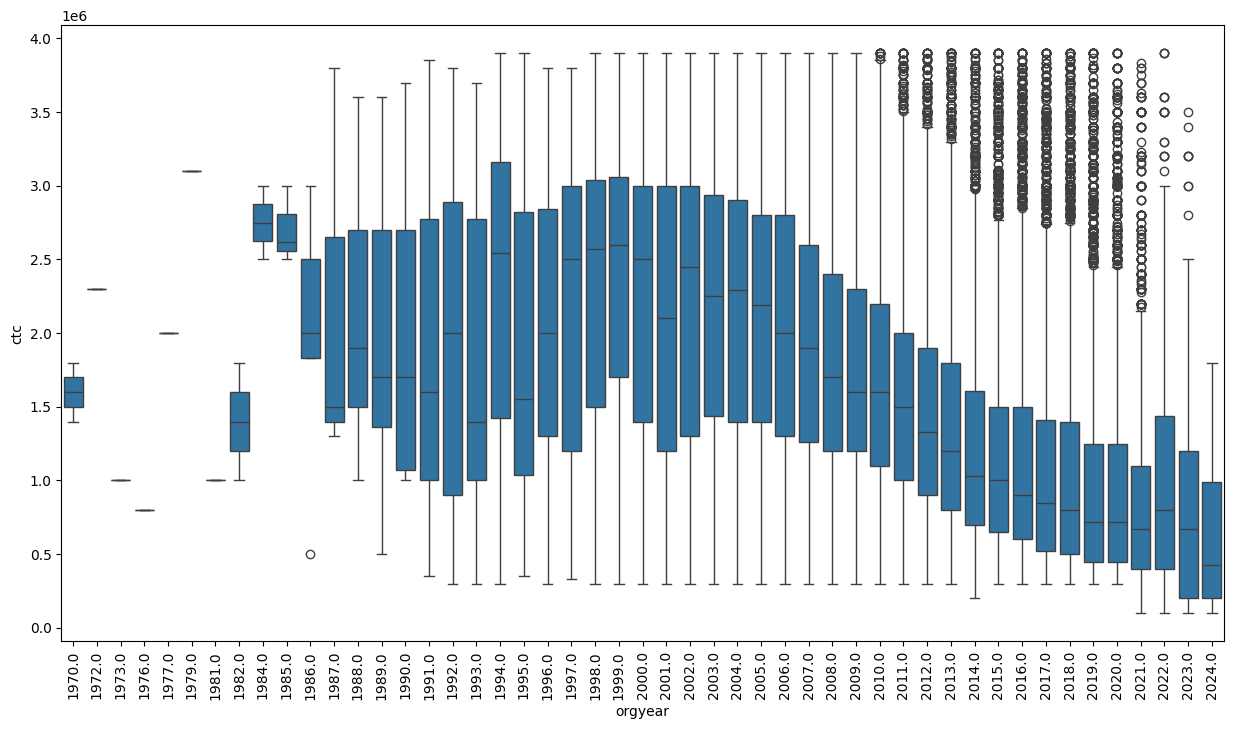

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=dftmp,x='orgyear',y='ctc')
plt.xticks(rotation=90)
plt.show()

* From the year 2013 we can see many outliers in the ctc column

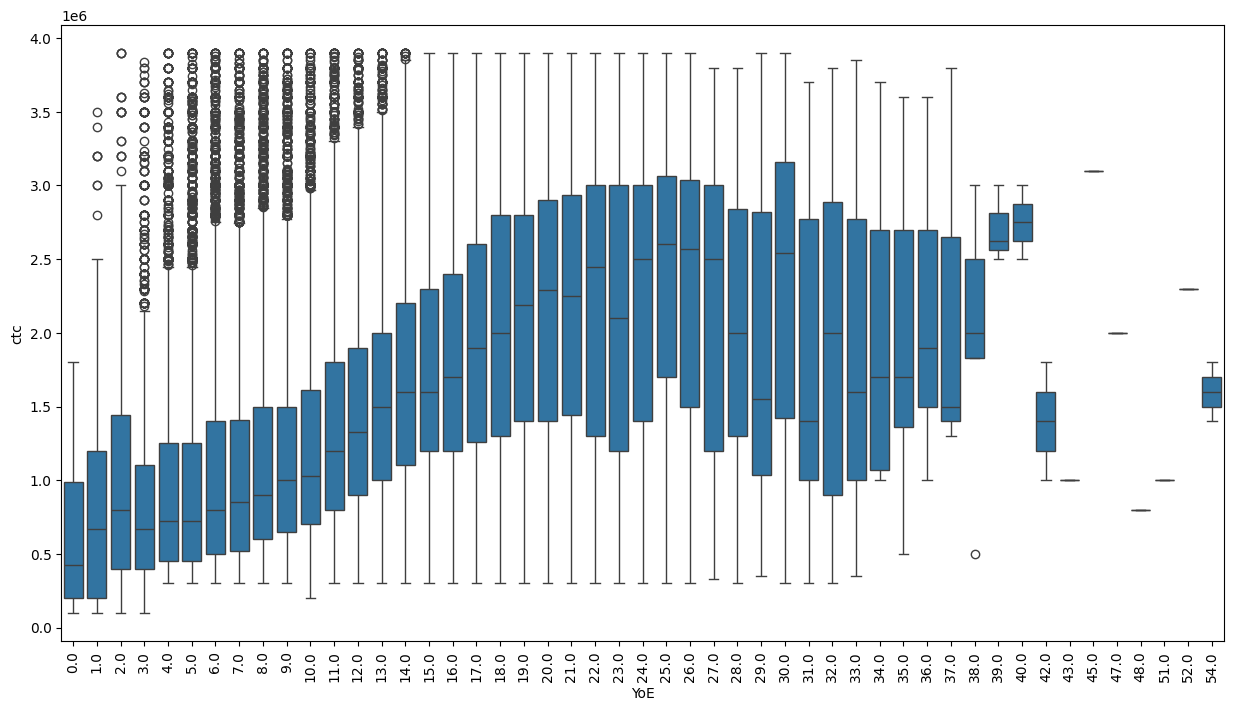

In [ ]:

plt.figure(figsize=(15,8))
sns.boxplot(data=dftmp,x='YoE',y='ctc')
plt.xticks(rotation=90)
plt.show()

## Manual Clustering

In [ ]:
# Group by 'company_hash', 'job_position', and 'YoE' (Years of Experience)
ctc_summary = data_f.groupby(['company_hash', 'job_position', 'YoE']).agg(
    mean_ctc=('ctc', 'mean'),
    median_ctc=('ctc', 'median'),
    max_ctc=('ctc', 'max'),
    min_ctc=('ctc', 'min'),
    count_ctc=('ctc', 'count')
).reset_index()

# View the summary
print(ctc_summary.head())

                     company_hash       job_position   YoE   mean_ctc  \
0                               0              Other   4.0  1000000.0   
1                            0000              Other   7.0   300000.0   
2                      01 Ojztqsj   Android Engineer   8.0  2700000.0   
3                      01 Ojztqsj  Frontend Engineer  13.0   830000.0   
4  05Mz Exzytvrny Uqxcvnt Rxbxnta   Backend Engineer   5.0  1100000.0   

   median_ctc    max_ctc    min_ctc  count_ctc  
0   1000000.0  1000000.0  1000000.0          1  
1    300000.0   300000.0   300000.0          1  
2   2700000.0  2700000.0  2700000.0          1  
3    830000.0   830000.0   830000.0          1  
4   1100000.0  1100000.0  1100000.0          1  


In [ ]:
# Merge the summary back into the original dataset
data_f = data_f.merge(ctc_summary, on=['company_hash', 'job_position', 'YoE'], how='left')

# View the updated dataset
print(data_f.head())

                                          email_hash           company_hash  \
0  00003288036a44374976948c327f246fdbdf0778546904...              Bxwqgogen   
1  0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...           Nqsn Axsxnvr   
2  0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...                  Gunhb   
3  000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...  Bxwqgotbx Wgqugqvnxgz   
4  00014d71a389170e668ba96ae8e1f9d991591acc899025...           Fvrbvqn Rvmo   

   orgyear        ctc        job_position  ctc_updated_year  \
0   2012.0  3500000.0    Backend Engineer            2019.0   
1   2013.0  2500000.0    Backend Engineer            2020.0   
2   2021.0  1300000.0  Fullstack Engineer            2019.0   
3   2004.0  2000000.0  Fullstack Engineer            2021.0   
4   2009.0  3400000.0       Not Available            2018.0   

       job_position_c     Job_Category   YoE  increment_flag  ctc_bin  \
0    Backend Engineer  Web Development  12.0               1     High   


In [ ]:
# Creating the 'designation' flag based on the comparison with mean_ctc
data_f['designation'] = data_f.apply(lambda row: 1 if row['ctc'] <= row['mean_ctc'] else (2 if row['ctc'] <= 1.5 * row['mean_ctc'] else 3), axis=1)

# View the updated dataset
print(data_f[['ctc', 'mean_ctc', 'designation']].head())

         ctc      mean_ctc  designation
0  3500000.0  3.050085e+06            2
1  2500000.0  2.500000e+06            1
2  1300000.0  1.228200e+06            2
3  2000000.0  2.000000e+06            1
4  3400000.0  3.766667e+06            1


In [ ]:
# Group by 'company_hash' and 'job_position' to calculate CTC summary
ctc_summary_class = data_f.groupby(['company_hash', 'job_position']).agg(mean_ctc_class=('ctc', 'mean')).reset_index()

# Merge back with original dataset
data_f = data_f.merge(ctc_summary_class, on=['company_hash', 'job_position'], how='left')

# Create the 'Class' flag similar to 'designation'
data_f['Class'] = data_f.apply(lambda row: 1 if row['ctc'] <= row['mean_ctc_class'] else (2 if row['ctc'] <= 1.5 * row['mean_ctc_class'] else 3), axis=1)

# View the updated dataset
print(data_f[['ctc', 'mean_ctc_class', 'Class']].head())

         ctc  mean_ctc_class  Class
0  3500000.0    2.821918e+06      2
1  2500000.0    2.500000e+06      1
2  1300000.0    1.333275e+06      1
3  2000000.0    1.786667e+06      2
4  3400000.0    2.556859e+06      2


In [ ]:
# Group by 'company_hash' to calculate CTC summary
ctc_summary_tier = data_f.groupby('company_hash').agg(
    mean_ctc_tier=('ctc', 'mean')
).reset_index()

# Merge back with original dataset
data_f = data_f.merge(ctc_summary_tier, on='company_hash', how='left')

# Create the 'Tier' flag similar to 'designation'
data_f['Tier'] = data_f.apply(
    lambda row: 1 if row['ctc'] <= row['mean_ctc_tier'] else (2 if row['ctc'] <= 1.5 * row['mean_ctc_tier'] else 3), axis=1
)

# View the updated dataset
print(data_f[['ctc', 'mean_ctc_tier', 'Tier']].head())

         ctc  mean_ctc_tier  Tier
0  3500000.0   2.761819e+06     2
1  2500000.0   2.500000e+06     1
2  1300000.0   1.444248e+06     1
3  2000000.0   1.832727e+06     2
4  3400000.0   2.685367e+06     2


### Questions on Manual Clustering

* Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [ ]:
# Top 10 employees in each company with Tier 1
# Filter employees in Tier 1
tier1_employees = data_f[data_f['Tier'] == 1]

# Sort by CTC to get the highest earners
top_10_tier1 = tier1_employees.sort_values(by='ctc', ascending=False).head(10)

# View top 10 Tier 1 employees
top_10_tier1[['email_hash', 'company_hash','job_position', 'ctc']]


,email_hash,company_hash,job_position,ctc
76608,8026ed2631a751bca556977fe1b363313b147583e60196...,Qxjvz Atctrgutqo Vza Ntwyzgrgsxto Ucn Rna,Not Available,4700000.0
73254,7aae9efa5d72e0c4d08f84f753aa5601ab2b3e54f2d903...,Mvwpmgvqa,Frontend Engineer,4700000.0
78335,830d14482a05e8fc096e9eb72786b532cbae6328c04828...,Cvzxoyxzs Ugxzn Ogrhto Axsxnvxo Rnav,Ios Engineer,4700000.0
78251,82efbe9368a43d55b3ac33cb02e8c3a521b5f79e3e2d9b...,Qoqxn,Backend Engineer,4700000.0
78248,82ee2d93f353081df821ef0bcbd71153a280572ce192ec...,Mvzp Mvkvvq Xzaxv,Backend Engineer,4700000.0
78218,82ddf62e95fbb3ec542eb523257c4e1bf115223fe48ad6...,Vqotvr,Other,4700000.0
77870,824c300af11582cc76c9b9ceace564701ca77831a8ac2c...,Xzonvpvqn Otqcxwt Ucn Rna,Other,4700000.0
77762,8220bdf833df522a206a782f1ddfcae1c1053c0b762a45...,Bvqprgsxw,Engineering Intern,4700000.0
77744,821796b85fbbb57c5bbbb09d663ab67e180a16f6928454...,Zecoaz Urvnegqb Td Lxg Wrgha,Not Available,4700000.0
77557,81d01cbb4aeb3e293b86153c6fbfcb6798e840bcb32193...,Ajzvnqvwt,Other,4700000.0


* Top 10 employees of data science in each company earning more than their peers - Class 1

In [ ]:
# Top 10 Data Science employees in each company with Class 1
top_class1_ds = data_f[(data_f['Job_Category'] == 'Data Science') & (data_f['Class'] == 1)]

# Sort by CTC to get the highest earners
top_10_class1_ds = top_class1_ds.sort_values(by='ctc', ascending=False).head(10)

# View top 10 Tier 1 employees
top_10_class1_ds[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
31032,33cbf116b651528cb7f9dd34b710e592b91d619f9f9143...,Vr Zvootq Wgbuvzj,Database Administrator,4700000.0
37431,3e7804b3aef9f10977903287530bb816dcde2d98e87bf3...,Exqonoghqwt,Data Analyst,4700000.0
37901,3f2b6d0221310f85584b6d35233a8b3380e23718d57091...,Tbtqogz,Data Analyst,4700000.0
28408,2f5e860c0bf1d897bdabcd4162844787b266ae000fc397...,Cvonvsrgmvr,Data Analyst,4700000.0
116072,c1fbe1c8665b8a1311d101c08d3947c37995b45018d079...,Ztnqvajzt,Data Scientist,4700000.0
37791,3f0027e4530a2f35665e6ae73ca70fa862abe742672131...,Shznhq,Data Analyst,4700000.0
110181,b7f4d0316974191b048e5afdbd5ec5586acb2a630bb8d6...,Qta,Data Analyst,4700000.0
78767,83bd6aa264e99ff345232e0930a8ea53db7d79f79f02a4...,Nhc Oha Oghny Voxv,Data Analyst,4700000.0
11454,12b7642fae3ee51b2842d0c2f61c35800355182e79899b...,Vxqmho Atetzwt Ouvwt,Data Scientist,4700000.0
102655,ab80f28a6c04bf134f44969a9589dc20fc8e8d065c9c99...,Xob Twgbuvzj,Data Scientist,4700000.0


* Bottom 10 employees of data science in each company earning less than their peers - Class 3

In [ ]:
bottom_class3_ds = data_f[(data_f['Job_Category'] == 'Data Science') & (data_f['Class'] == 3)]

bottom_10_class3_ds = bottom_class3_ds.sort_values(by='ctc', ascending=True).head(10)

bottom_10_class3_ds[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
92960,9b63ba8af16b2692b1a0715978c61dd42c194a285859db...,Wvustbxzx,Data Analyst,970000.0
83004,8ad68fa687f8a06ec30021e469385bdb2a30dd1842c297...,Znn Avnv Otqcxwto,Data Analyst,1000000.0
60685,6554eeda7afa59338c5ee03543d1bb45d253aaecf1466f...,Wvustbxzx,Data Analyst,1000000.0
45379,4c1bd6fe07de852bd69d2ded08a76f615a8cc113cdd74a...,Xmb,Data Analyst,1000000.0
17469,1cd6d167efd75b83afd27f5e9eb255d2f5cfc526efcab2...,Wvustbxzx,Data Analyst,1000000.0
101662,a9dd43eee538184fdc160f1fd34fcfd6fac1ddb9ba970b...,Zgn Fgqpxzs,Data Analyst,1000000.0
37165,3e0453a3141633fe917fe3d3d216cb8d48f312444a9ef8...,Nvnv Trdox,Data Scientist,1030000.0
13895,16cfec2b4d057c013dbbbf5489c48d5be45aa6b9feb2a0...,Wvustbxzx,Database Administrator,1080000.0
42431,470278f7a884a0e4749956c8cd4ebeed4afd52aa950eac...,Xzegojo,Data Scientist,1080000.0
47423,4f7f603226870b12d12e8175e4409e630a35d671e71639...,Wvustbxzx,Database Administrator,1080000.0


* Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [ ]:
tier3_employees = data_f[data_f['Tier'] == 3]

bottom_10_tier3 = tier3_employees.sort_values(by='ctc', ascending=True).head(10)

bottom_10_tier3[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
26756,2c7f3af809e6cf296f2212e5fde8d1a0e64160545cf43d...,Wqton Xzegojontbo Ucn Rna,Other,480000.0
117875,c4f40282103dd6cac1754c4c74c34195c7b267bb9ae9ad...,Wob Ntwyzgrgsxto,Fullstack Engineer,540000.0
108967,b5f7427c58ba9593162709676c8162d4fdb7a5645333d4...,Xbtqxn,Backend Engineer,650000.0
18886,1f47776ad6ced6685db4cf2d3c1a3acdd5728adee536b7...,Nxtngtcqj,Not Available,680000.0
108499,b5361eff5ad511b320f638e8c858128202fe611fa9151e...,Otqcgojo Ogrhnxgzo,Fullstack Engineer,700000.0
27689,2e2f1ae2a4f1a4bf52866c0918b142f65ccf033f1ae83a...,Bvqihxo Ntwyzgrgsxto,Qa Engineer,700000.0
68351,72510d2481468bc6c4b39194c0cd1b5f8824e9adca0da0...,Scp Tbqx,Android Engineer,700000.0
10116,10900d7ad756c1f2417510f46ef2350093629f15f2ccab...,Vonqtjv,Support Engineer,700000.0
29659,317d651ffb7b76997ea63b795d78223b1ec5d804d674b3...,Mvwvzwj Ntwyzgrgsj,Backend Engineer,720000.0
42272,46c41cfcee23a4ad6c38ba2e3ce2157bdaeca0ecb603b9...,Tznqtuqtzthqoyxu Wtrr Zxn Qghqptrv,Data Scientist,750000.0


Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [ ]:
data_f['Job_Category'].value_counts()

,count
Job_Category,
Web Development,98881
Other,44242
Data Science,7988
Management,2052
Analysis & Consulting,120
Education,11


In [ ]:
def get_top_employees(df, experience_range,tier, department):
    # Filter by experience, department, and tier
    filtered_df = df[(df['YoE'].isin(experience_range))]
    filtered_df = filtered_df[filtered_df['Tier'] == tier]
    filtered_df = filtered_df[filtered_df['Job_Category'] == department]
    filtered_df = filtered_df[filtered_df['job_position'] != 'Not Available']

    # Group by company and sort by salary within each company
    top_employees = filtered_df.sort_values(by='ctc', ascending=False).head(10)

    return top_employees

# Top 10 employees in 'Data Science' department with 5-7 years experience in Tier 1
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=1, department='Data Science')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
109383,b6a1a6993706b2d025cf89e0fc044295c445e688ac79d8...,Mtxtqoagqe Vs,Data Scientist,4700000.0
78767,83bd6aa264e99ff345232e0930a8ea53db7d79f79f02a4...,Nhc Oha Oghny Voxv,Data Analyst,4700000.0
18475,1e947c3fb61c0565f52ab3144a3d8f4aa5c2c10f16fc7c...,Hzxctqoxnj Ge Srvosgf,Data Scientist,4700000.0
32140,3591ab14890d4f0528a58d545828511833261095f394d6...,Oghqwt Ygc Uqxcvnt Rxbxnta,Data Analyst,4700000.0
54821,5b9d25111e786a01356529a553c212bce326575af0d800...,Aaw,Data Scientist,4700000.0
34347,393ae7a9ef0baed1f277a6269539d0816423f6c64a51d3...,Svrxwxv,Data Scientist,4700000.0
121032,ca4a8022f388b843921b80973dacbf69bcae51c59474c2...,Eogen,Data Analyst,4700000.0
34444,395e64f0731737f14913665fb563df92c9b93bb27f08f5...,Thqtpv Vx,Data Scientist,4700000.0
37791,3f0027e4530a2f35665e6ae73ca70fa862abe742672131...,Shznhq,Data Analyst,4700000.0
81994,892bc2ea8b65ea85c15c5e26e7740f06a9ed771dfac0bf...,Tnkvsqghu,Data Scientist,4700000.0


In [ ]:
# Top 10 employees in 'Data Science' department with 5-7 years experience in Tier 2
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=2, department='Data Science')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
138476,e75582ef0e3e00b02d4d1ae42574f2a6b283ba415d8693...,Obo Avnvntwy,Data Scientist,4700000.0
32616,365ccc1c4ad25f60b543789ec49b3aa11796f65d8b297d...,Agbxzgo,Data Scientist,4700000.0
146848,f516e8e97cf6cb0c7c6d4d8484b1fbfeced4b3e931857c...,Wyvqrto Owyfvm,Data Scientist,4700000.0
88628,941809c8e8bad670f1f124ee68d805c3ed1a170df088fc...,Otqcxwtzgf Ogenfvqt Atctrgubtzn Xzaxv Ucn Rna,Database Administrator,4150000.0
62413,6848d64d66f83e0a29a805b3310d465e7466152074b196...,Sgrabvz Ovwyo,Data Analyst,3800000.0
32501,362fbc1335edf7cb8d26aeb008e87da3d8557d71379a1a...,Qxcxsg,Data Scientist,3750000.0
143814,f023a0b84901a9f34f014839b651e80689452d6497033c...,Sgrabvz Ovwyo,Data Analyst,3700000.0
127716,d56830c7863c89fbc858f2149c80b9622a1d493c090813...,Sgrabvz Ovwyo,Data Analyst,3600000.0
2474,0437e3a65fc237373beca280415292a3b19c74946b3c81...,Qxcxsg,Data Scientist,3600000.0
145879,f380b8aab377777dfeb2ca5a8c6de14c49b8bed57bd69b...,Yxpt Btootzstq,Data Scientist,3500000.0


In [ ]:
# Top 10 employees in 'Data Science' department with 5-7 years experience in Tier 3
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=3, department='Data Science')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
152754,ff11a667443ee33d9cda92a6277fbdfaa7a1c504f6d258...,Omx,Database Administrator,4700000.0
131605,dbe69489e90259e9b9728173c008500de585ee85f2c614...,Sgrabvz Ovwyo,Data Analyst,4700000.0
61152,661b43fa54584d1c72f190095f1280f6e5b0d5c1e8722c...,Mvwpuvwp,Data Scientist,4700000.0
60701,655da5cd99f1ba4ad249dade5039b914023484fb7f3959...,Nvnv Wgzohrnvzwj Otqcxwto,Data Analyst,4700000.0
58452,619f72985c082b2e347abed25985593d32faaeaea0747c...,Ovwyxz,Database Administrator,4700000.0
56254,5e00ddb58e2de8f6a53a9bf0fb1b0bfbd29775203696f7...,Ihvrwgbb,Data Scientist,4700000.0
55083,5c063559a651d91b4f3f81091e6bcee8ba75de9dc365ec...,Rtvqzxzsbvnt,Data Analyst,4700000.0
127350,d4cf261b872f581ebf57d1986263b0256a97f9d52fec96...,Pvznvq Ehnhqto,Data Scientist,4700000.0
129682,d8b6c25488ee764c6dbd20c56ad8dca794b6347d6448e2...,Tqxwoogz,Data Scientist,4700000.0
52230,5786e82bd211093df08e360d9af9ea6adea8fe6885477b...,Atrr,Data Scientist,4700000.0


In [ ]:
#Top 10 employees in 'Web Development' department with 5-7 years experiance in Tier1
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=1, department='Web Development')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
24215,28389a5d7e87ccfb68a628f04da963511a0022db1c714a...,Fxoy,Fullstack Engineer,4700000.0
139380,e8e16d67926434f97620fba8721433e5003825ab2e7b88...,Wgzohbtq Uqxgqxnj Otqcxwt,Fullstack Engineer,4700000.0
81408,88342cfa92cd3cb2f52296efa514a238209a5c2705999d...,Ogex,Frontend Engineer,4700000.0
80941,87651e53e79f7b00e651cc9264ff92a894d5482ba6f59e...,Fhzatqervno Sbmy,Fullstack Engineer,4700000.0
139687,e963745a4e2704ccf91e24c49e9f079a7365a49939af98...,Qtytvqovr,Fullstack Engineer,4700000.0
13297,15c349b622c4ec12ebb67490151ad36807d31e24ffdf9f...,Ho Vuuvqtr,Backend Engineer,4700000.0
80482,869695ac9f3c39bad74398a28158374a0f47ea9c891e09...,Urvwtxi,Backend Engineer,4700000.0
13436,1602e660c40d84dc9c1f07b2cfd4b67704c7145d80b5ea...,Ktqxgz,Ios Engineer,4700000.0
13633,16563a7279c73c2cf776d6f0c853914c871914e94221a3...,Txotzcvhrn,Fullstack Engineer,4700000.0
78553,8367bac6bdb47a042823cf89fd176dbd72d4385fe0c8de...,Otpgb Agg,Backend Engineer,4700000.0


In [ ]:
#Top 10 employees in 'Web Development' department with 5-7 years experiance in Tier2
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=2, department='Web Development')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
15908,1a42ad8db1c5d2dd5a6b847ea73c367643b1e3fe153a09...,Vsgav,Backend Engineer,4700000.0
46269,4d9cd2e5c16db728d659f434f33007cc74cf66ee1f8837...,Ftm Atoxsztq,Frontend Engineer,4700000.0
35645,3b7170bbc8ba493d832a3a42aee3133a48e9ca8f358f0a...,Wgytoxnj,Backend Engineer,4700000.0
10248,10c5d19ac8fe40111b09ff3225f65cce8d39ec13994719...,Fgqpo Vuurxwvnxgzo Wg Rna,Fullstack Engineer,4700000.0
3625,0607ffbd2833fbed9c8f560288a4a800408217f2c0672c...,Ygbt Atugn,Fullstack Engineer,4700000.0
107878,b42aea8c0fc91cad825f93fc30dd7287e02ef18265296c...,Hmtq,Backend Engineer,4700000.0
133571,df36a2dd8f27ac809a25d730a132cef50b0c1ecdcc2605...,Ltnmrht,Frontend Engineer,4700000.0
147043,f567740bac46611d3320a5a9044ca2cc183af205cdd161...,Ngftq Qtotvqwy Wvuxnvr,Backend Engineer,4700000.0
57186,5f802bdaca04966e2e785a95e178eeb189863ee5493601...,Fgqpo Vuurxwvnxgzo Wg Rna,Backend Engineer,4700000.0
147177,f5a09446e70763fb8cce6dca6d552274101fe5af5a53d5...,Ojqvwhot Hzxctqoxnj,Fullstack Engineer,4700000.0


In [ ]:
#Top 10 employees in 'Web Development' department with 5-7 years experiance in Tier3
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=3, department='Web Development')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
188,00541df991932ebcd56304401ec2a59848045c3033e666...,Wgcxvb,Fullstack Engineer,4700000.0
94229,9d679cfdd042562c6e88f05b23600e621721b645ea0b7b...,Uqxzwxuvr Exzvzwxvr Sqghu,Devops Engineer,4700000.0
74253,7c5d14e63fc80d08078d3ceefbc899c1cf9e94a45b9a00...,Srvooaggq,Backend Engineer,4700000.0
74472,7cae6ff4ae60b15d4c3ee8b984858cfcdc197d7bd2387c...,Exwg Xzaxv Ucn Rna,Frontend Engineer,4700000.0
74536,7cc6c6da909a1738a993dba38941e79d3b0061feb6bb6e...,Ktbgog Ntwyzgrgsxto,Fullstack Engineer,4700000.0
74546,7cc90eb17876fa5e0e96b5a83915270aa8c7b3f289313e...,Ctqxkgz,Research Engineers,4700000.0
74562,7ccf11cb54a14b0d7384a7edaf6b7bfd5ea760e55aff60...,Btzngq Sqvuyxwo,Backend Engineer,4700000.0
74647,7cf12a9fa06357f5c6c1470b2ef18f9d5d9602402e3c74...,Rgctrj Uqgetooxgzvr Hzxctqoxnj,Backend Engineer,4700000.0
74744,7d1c471e51586cf957b98d909ae07cccedd1f884a23170...,Ihmgrt,Fullstack Engineer,4700000.0
75429,7e40d524195671e3daeefd3cef32de5a2241dab98971ad...,Sqvm,Backend Engineer,4700000.0


In [ ]:
#Top 10 employees in 'Other' department with 5-7 years experiance in Tier 1
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=1, department='Other')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
100490,a7ff95d399e2822b866066d08467f99711e3894ba79b96...,Ofvbx Cxctpvzvzav Xzonxnhnt Ge Owxtzwt Vza Ntw...,Other,4700000.0
68368,7257754332cb8ae518c4e48c6d3ee276bd4f6401007646...,Tduqtoo Qgvafvjo,Other,4700000.0
72807,79df3c040592f8d30dd71c3bdecba3d2eb9241df6cfdc7...,Jhnx Atoxsztq Yghot,Other,4700000.0
149313,f925b76302b42c5f15c7779679f1bc49ea4f0691bc5d0d...,Ytrxwgunxw Ogrhnxgzo,Other,4700000.0
58418,618f77ae39eb6bf4fe718e2dcf59975209f68bf16f564c...,Pvbqhu Wgrrtst Ge Cgwvnxgzvr Nqvxzxzs,Computer Faculty,4700000.0
58328,61670b8a6f2725f811a41b8c0514d2447a55ddde0e3671...,Yvfrtq Uvwptq,Other,4700000.0
99274,a5e85d086efff69179baeaadb7aa1b5a3aa381abe343be...,Xgfv Onvnt Hzxctqoxnj,Other,4700000.0
140672,eb07fede9972e82bec8351fd8d88da1f7ca69e97472582...,Tmqvzacvrht,Other,4700000.0
128933,d76a33f4c261b315c9962929864c721cafdb48dc360673...,Rxetbgnt,Other,4700000.0
62935,69262cc6ce61fa14e98d892cc0a17ecc55766538ce1b5f...,Xzaxvzv Sqvnxzso Ucn Rna,Other,4700000.0


In [ ]:
#Top 10 employees in 'Other' department with 5-7 years experiance in Tier 2
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=2, department='Other')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
150178,faa804eddc740f849971438d16052a8b793a8adeb9272a...,Ogmyv Rna,Other,4700000.0
115135,c05ddd215a3b25bae9a4b902fbae6b394040e16b606182...,Wtqxaxvz,Other,4700000.0
82425,89e4f8e921ea205e2b5512cce828f634aa8214ef12f799...,Ayr Tduqtoo,Other,4700000.0
76184,7f7951164b611e0aec41b488eb111754f7650be2f358b5...,Aepx,Other,4700000.0
135532,e277b66ed9097de9555b42c8d26aef39c33fa172a2edfa...,Tznqtuqtzthq Exqon,CoFounder,4700000.0
20990,22d14a995bf37bf96b38794d00ce2f071223bf3da8fdc2...,Sqxa Ajzvbxwo,Other,4700000.0
11757,13381293f5b89e0e3a0bdf8f86e23660550c84b702fc8b...,Tbxqvnto Vxqrxzto,Other,4700000.0
11079,121e2597a17047d58437a0af53c1abdc85c4bd92f42bee...,Ngftq Qtotvqwy Wvuxnvr,Other,4700000.0
150410,fb10b6e7b4fcc82e96f5a591146046c0988c23cccb8269...,Zvnxgzvr Wgrrtst Ge Xqtrvza,Other,4700000.0
63123,69852762aee5522466aec27a360b8538fefd6e14ab4c0c...,Bvqptnxzs,Other,4700000.0


In [ ]:
#Top 10 employees in 'Other' department with 5-7 years experiance in Tier 3
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=3, department='Other')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
74175,7c38f2f91734cc14ce39222d218e1ddcc8d512f2dbc2c7...,Zgpxv,Research Assistant,4700000.0
55217,5c3e5c1a68b818fd7440947f10cdc710b54c34631b8aa9...,Hzxntaytvrny Sqghu,Sdet,4700000.0
24619,28ed9c56ee5ea9946a9b1f0b59197bd0a2ab4f0d862c48...,Wgzwtznqxd,Other,4700000.0
56509,5e67d0110e4ee01a7cbed86bb7c716a32c5ee23cf7c551...,Yaew Mvzp,Other,4700000.0
25820,2af4b02cd47a3b8b2a447d8a156ddb55675bf05d87ae09...,Buyvoxo Ucn Rna,Other,4700000.0
127719,d56968ab2c60f353f5c80f3e6b683e19bf4d80aba678ea...,Ihmgrt,Sdet,4700000.0
26452,2bee22a53fc5831c99da9b7168724a4eac75cde4abdfa1...,Nvnv Wgzohrnvzwj Otqcxwto,Other,4700000.0
116231,c240203d659ee5ef1a7ed9d8368ec86b7fc1d21e10701b...,Wgzwtznqxd,Other,4700000.0
55236,5c48943169e73396d8066c23f7ebad96a09900fdd7e227...,Bwvett,Sdet,4700000.0
27577,2dfd6e8346ec1a69281cdb0242e3812982639f73bb7893...,Otre Tburgjta,Other,4700000.0


In [ ]:
#Top 10 employees in 'Management' department with 5-7 years experiance in Tier 1
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=1, department='Management')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
56070,5dbd775ef30d1e0aae48feab6b07624ad1cfd4c3beaa83...,Xzntqvwnxctmttoucn,Product Manager,4700000.0
46655,4e425f49fce14ec8f4392939376e91410f0beac0b43a3d...,Uqtwxej,Program Manager,4700000.0
146375,f453b06c22a1a4745091bda9ccb401024118a7ce08ac5d...,Bwvett Rrw,Program Manager,4700000.0
91020,9819dc1cae0675c9a1e5a48e761ab76164d9c24edd298b...,Pytjnx,Program Manager,4700000.0
34055,38b739cfbdfbc9714c819ca9002cc9c2d87cad81754058...,Qvbptoyvc,Product Manager,4700000.0
112777,bc614cfc1b66263907ed5cde1574e5a7c25aedc1d96e56...,Lvqcxo,Product Manager,4700000.0
118409,c5de488ff5947b069eaad2abe3357d1b4a7f61d58f5da8...,Mmag,Product Manager,4700000.0
15830,1a1e837160e793b77d8ff9b4d5861407abc8d385d56dbe...,Bvbmvq Ge Bvzvstbtzn,Product Manager,4700000.0
51595,567764e991114f22dbae9c4f804f6a74f8ef6e8f0dc56b...,Lvx Zvqvjvz Nqvatqo Ucn Rna,Product Manager,4700000.0
148267,f779169b3d3274025c5e8c56df442a1caf690a4fb05544...,Ntwyrtvao Tdxb Ucn Rna,Product Manager,4700000.0


In [ ]:
#Top 10 employees in 'Management' department with 5-7 years experiance in Tier 2
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=2, department='Management')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
148482,f7da51e8172d83dac04e9d7266937fd1fa125c3feca669...,Agbxzgo,Product Manager,4700000.0
117608,c484e3bca8a7f6c8c3a0ff1b4bd9f47082b0a22a711105...,Ygztonmtt,Product Manager,3300000.0
71563,77d4f99d44c1ceba607002441a26420f6e7f6b5fef1085...,Ofxssj,Program Manager,3300000.0
117256,c3f1f57a1deac1c14416315f6abf9a531b9e18589cc988...,Mghzwt,Product Manager,3260000.0
35910,3be787faeeb12757123b98f08f3cbf8b091471c436ab5c...,Uvjuvr,Product Manager,3115000.0
107858,b41fa5fbd35022fade39172d881bd964c979ff65e94457...,Xznhxn,Product Manager,3050000.0
141844,ecf515f9f9222e67d2260ea9c65269128ec1261f6b199c...,Grd Sqghu,Product Manager,2900000.0
142410,eddac752a54e64699e22d3eaef2c386cf5103ee8fea963...,Bvsxwuxz Ovbvon Ntwyzgrgsxto,Product Manager,2500000.0
22303,24f611461212219fac09a532b6a1d7579ac65a32a42657...,Grv Vzx Ntwyzgrgsxto Ucn Rna,Product Manager,2300000.0
39202,417fcb075aa33272599d2e9de887769e1d69fcb9413b9a...,Fvrwyvza Wgrrtst Ge Tzsxzttqxzs Ovzsrx,Product Manager,2300000.0


In [ ]:
#Top 10 employees in 'Management' department with 5-7 years experiance in Tier 3
result = get_top_employees(data_f, experience_range=[5, 6, 7], tier=3, department='Management')
result[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
112031,bb19a224b844bd79a79af0b920bfcf7f18864551412918...,Nb Sqghu Ge Wgbuvzxto,Program Manager,4700000.0
140706,eb138859cb8c4806659b05ff6d72d3756044d0cfe295fa...,Qtrxvzwt Xzegwgbb Rxbxnta,Product Manager,4700000.0
4125,06c7cd6c1a50803bac81950ad450a0e78165cb7c09ddfe...,Gnytqo,Product Manager,4700000.0
118522,c6102e363a2f6b2bb00b8ca38789be579ecb8f3ddd423b...,Wgszxkvzn,Security Leadership,4700000.0
138048,e6aceb3bbfddae543ce3dffc7563ee34562eb42f91e5d2...,Ouxwtltn Rxbxnta,Security Leadership,4700000.0
141162,ebcbbb2449ea5c5fcf2f844c27bc2c127e31115de7ae9b...,Grv Vzx Ntwyzgrgsxto Ucn Rna,Product Manager,4700000.0
56278,5e0b1ae0bd3a4d941861cd3c1b9286cb265de79220ce82...,Jvnqv Gzrxzt Uqxcvnt Rna,Product Manager,4700000.0
106484,b1d2d64dfbf029e63768194ea64e111ac7d04f0aa4f5e6...,Zvz,Product Manager,4700000.0
132653,ddb49d867aebcf40c3c5c5ff9d66ac6ab46440b6702c8c...,Zgpxv,Product Manager,4700000.0
120148,c8d2ac59152263773f2b12febbfc9fb3070e02aa99663e...,Wtrxsg Xzw,Product Manager,4000000.0


* Top 10 companies (based on their CTC)

In [ ]:
top_10_companies = data_f[['company_hash','ctc']].sort_values(by='ctc', ascending=False).head(10)

top_10_companies

,company_hash,ctc
92773,Fgqpo Vuurxwvnxgzo Wg Rna,4700000.0
99681,Vqnxexwxvr Xzntrstzwt Mvota Uqgahwn Wgbuvzj,4700000.0
30024,Ntwy Bvyxzaqv,4700000.0
99737,Bxwqgogen,4700000.0
139828,Eqgznxtq Owyggro,4700000.0
99749,Xb V Onhatzn,4700000.0
29997,Zgn Vuurxwvmrt Vwwghzn,4700000.0
99774,Vbvkgz,4700000.0
29991,Cxoxgz 13,4700000.0
99778,Vznmqvxzo,4700000.0


* Top 2 positions in every company (based on their CTC)

In [ ]:
tmp = data_f[data_f['job_position'] != 'Not Available']
top_2_positions = tmp.groupby('company_hash').apply(lambda x: x.nlargest(2, 'ctc')).reset_index(drop=True).sort_values(by='ctc', ascending=False)

top_2_positions[['email_hash', 'company_hash','job_position', 'ctc']]

,email_hash,company_hash,job_position,ctc
33000,4a7d1ffe31f5fa8a69ce6d3b85bd511c09c4b535d9a31a...,Wgatbvqp,Fullstack Engineer,4700000.0
37504,19bd989899df0b8553617d99bae741575eaa4bfa85ff80...,Xzcjsg,Fullstack Engineer,4700000.0
16876,0facee042e975b8cd66f2b84eb0f2b48c58505f2bad5d2...,Ohutq Wrxwpo Onhaxg,Engineering Leadership,4700000.0
37507,98f055a0cad7cfef1ebab6619337b49a5ab144e9141757...,Xzcton Otghr,Backend Engineer,4700000.0
5489,fd6f7bc7674df2f678c2da3499e9f2381d0ea83185cce7...,Cxpx Xzw,Backend Engineer,4700000.0
...,...,...,...,...
4847,03d3522d23d5c53a90ea252bca488815282c2781e45a79...,Ctqov Wrgha Tqu,Engineering Intern,100000.0
21189,5f77c366fb783b869fcfe5630b5d56607c07d1db2cdc9f...,Pzxsyn Mxnt,Android Engineer,100000.0
12726,2bc8fdcb889f70b0234110a6198d2e0b27566cea915fd0...,Mvowysg Bvxzntzvzwt Ucn Rna,Support Engineer,100000.0
32802,ff76a7ff1bbf6718b2de1d057d858ecd37392004d244c0...,Vzvrjnxwoagbvxz,Engineering Intern,100000.0


### Data Preprocessing

In [ ]:
data_f.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,job_position_c,Job_Category,YoE,increment_flag,...,mean_ctc,median_ctc,max_ctc,min_ctc,count_ctc,designation,mean_ctc_class,Class,mean_ctc_tier,Tier
0,00003288036a44374976948c327f246fdbdf0778546904...,Bxwqgogen,2012.0,3500000.0,Backend Engineer,2019.0,Backend Engineer,Web Development,12.0,1,...,3.050085e+06,2800000.0,4700000.0,1350000.0,47,2,2.821918e+06,2,2.761819e+06,2
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Nqsn Axsxnvr,2013.0,2500000.0,Backend Engineer,2020.0,Backend Engineer,Web Development,11.0,1,...,2.500000e+06,2500000.0,2500000.0,2500000.0,1,1,2.500000e+06,1,2.500000e+06,1
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,Gunhb,2021.0,1300000.0,Fullstack Engineer,2019.0,Fullstack Engineer,Web Development,3.0,1,...,1.228200e+06,1300000.0,1600000.0,710000.0,5,2,1.333275e+06,1,1.444248e+06,1
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000.0,Fullstack Engineer,2021.0,Fullstack Engineer,Web Development,20.0,1,...,2.000000e+06,2000000.0,2000000.0,2000000.0,1,1,1.786667e+06,2,1.832727e+06,2
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Fvrbvqn Rvmo,2009.0,3400000.0,Not Available,2018.0,Not Available,Other,15.0,1,...,3.766667e+06,3900000.0,4000000.0,3400000.0,3,1,2.556859e+06,2,2.685367e+06,2


In [ ]:
data = data_f.copy()

#### Dropping Unwanted Columns

In [ ]:
#Dropping
data.drop(['mean_ctc_class','orgyear','company_hash','email_hash','mean_ctc', 'max_ctc', 'min_ctc', 'count_ctc','job_position','ctc_updated_year','ctc_bin','avg_ctc_per_company','median_ctc','mean_ctc_tier','Job_Category'], axis=1, inplace=True)
#rename job_position_c
data.rename(columns={'job_position_c': 'job_position'}, inplace=True)

In [ ]:
data.columns

Index(['ctc', 'job_position', 'YoE', 'increment_flag', 'designation', 'Class',
       'Tier'],
      dtype='object')

In [ ]:
#Selecting the categorical columns
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['job_position']


In [ ]:
data['job_position'] = df['job_position'].replace(['Not Available', 'na', 'nan'], np.nan)

In [ ]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data["job_position"]=LE.fit_transform(data["job_position"])

In [ ]:
# Imputing Not Available using knn inputation in job_position
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')
data['job_position'] = imputer.fit_transform(data[['job_position']])
#make job_position interger
data['job_position'] = data['job_position'].astype(int)

In [ ]:
data.head()

,ctc,job_position,YoE,increment_flag,designation,Class,Tier
0,3500000.0,419,12.0,1,2,2,2
1,2500000.0,271,11.0,1,1,1,1
2,1300000.0,129,3.0,1,2,1,1
3,2000000.0,129,20.0,1,1,2,2
4,3400000.0,271,15.0,1,1,2,2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_ds = pd.DataFrame(scaler.transform(data),columns= data.columns )
s_ds = scaler.transform(data)

In [ ]:
scaled_ds.head()

,ctc,job_position,YoE,increment_flag,designation,Class,Tier
0,1.771013,-0.124000,0.645130,0.27711,1.430360,1.012577,0.821667
1,0.894872,-0.573659,0.415987,0.27711,-0.459877,-0.560183,-0.610016
2,-0.156497,-1.005088,-1.417154,0.27711,1.430360,-0.560183,-0.610016
3,0.456801,-1.005088,2.478271,0.27711,-0.459877,1.012577,0.821667
4,1.683399,-0.573659,1.332558,0.27711,-0.459877,1.012577,0.821667


In [ ]:
scaled_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153294 entries, 0 to 153293
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ctc             153294 non-null  float64
 1   job_position    153294 non-null  float64
 2   YoE             153294 non-null  float64
 3   increment_flag  153294 non-null  float64
 4   designation     153294 non-null  float64
 5   Class           153294 non-null  float64
 6   Tier            153294 non-null  float64
dtypes: float64(7)
memory usage: 8.2 MB


## Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
#Hopkins Statistic
from scipy.spatial.distance import cdist
random_data = np.random.uniform(np.min(s_ds), np.max(s_ds), size=s_ds.shape)

# Calculate distances
distances_to_data = cdist(s_ds, s_ds, metric='euclidean')
distances_to_random = cdist(s_ds, random_data, metric='euclidean')

# Find minimum distances
min_distances_to_data = np.min(distances_to_data, axis=1)
min_distances_to_random = np.min(distances_to_random, axis=1)

# Calculate Hopkins statistic
hopkins_statistic = np.sum(min_distances_to_random) / (np.sum(min_distances_to_data) + np.sum(min_distances_to_random))

print("Hopkins Statistic:", hopkins_statistic)

Hopkins Statistic: 1.0


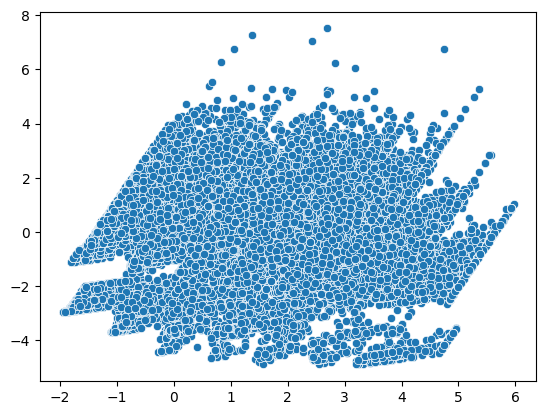

In [ ]:
pca=PCA(n_components=2)
pca_data=pca.fit_transform(s_ds)
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1])
plt.show()

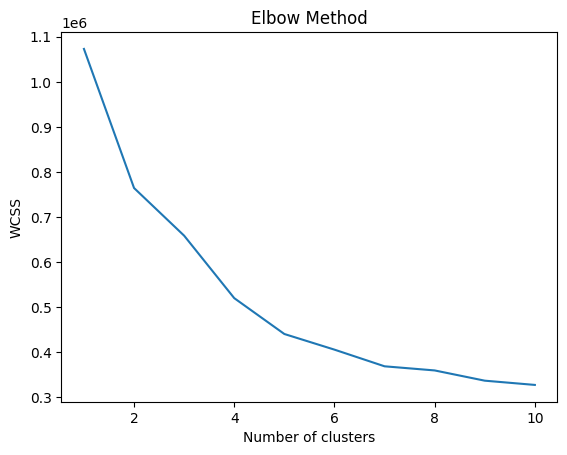

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(s_ds)
    wcss.append(kmeans.inertia_)  # inertia is the sum of squared distances to cluster centers

# Plotting the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### K-means Clustering

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(s_ds)

KMeans(n_clusters=4, random_state=42)

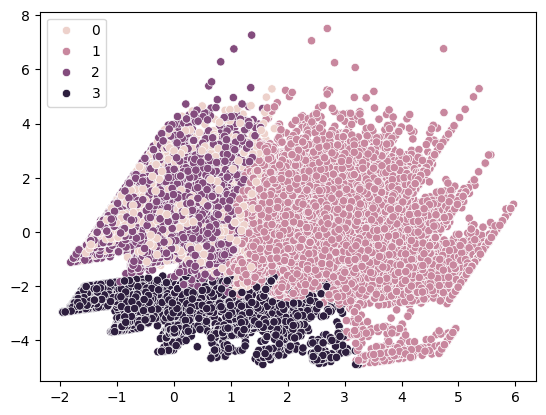

In [ ]:
pca=PCA(n_components=2)
pca_data=pca.fit_transform(s_ds)
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=kmeans.labels_)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

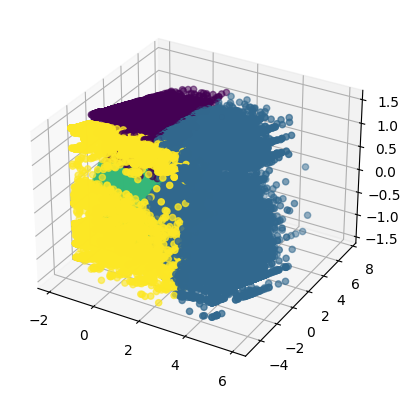

In [ ]:
pca=PCA(n_components=3)
pca_data=pca.fit_transform(s_ds)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2], c=kmeans.labels_)
plt.show()

In [ ]:
data['labels'] = kmeans.labels_
pd.DataFrame(data.groupby("labels")[['ctc', 'job_position', 'increment_flag', 'YoE', 'designation',
'Class', 'Tier', 'labels']].agg({"ctc":"median","job_position":pd.Series.mode,'increment_flag':pd.Series.mode, 'YoE':pd.Series.mode,\
'designation':"median",'Class':"median",'Tier':"median"}))

,ctc,job_position,increment_flag,YoE,designation,Class,Tier
labels,,,,,,,
0,940000.0,942,1,8.0,1.0,1.0,1.0
1,2650000.0,942,1,8.0,2.0,2.0,3.0
2,900000.0,129,1,8.0,1.0,1.0,1.0
3,750000.0,942,0,5.0,1.0,1.0,1.0


### **Cluster Info**
1. **CTC (Salary) Range**:
   - Cluster 1 has a high CTC value (₹2,650,000), while clusters 0, 2, and 3 have relatively lower CTCs, with the highest being ₹940,000.

2. **Job Position**:
   - Clusters 0, 1, and 3 share the same job position (942), while Cluster 2 has a different position (129).

3. **Increment Flag**:
   - Most clusters (0, 1, and 2) have an increment flag set to 1, indicating a salary increment, except for Cluster 3 (flag set to 0, no increment).

4. **Years of Experience (YoE) and Designation**:
   - Clusters 0, 1, and 2 have 8 years of experience, while Cluster 3 has 5 years.
   - Cluster 1 has a higher designation (2.0) compared to the others (1.0).

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
indices=np.random.choice(s_ds.shape[0], size=20000, replace=False)
s_ds=s_ds[indices]
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(s_ds)
silhouette_score(s_ds, kmeans.labels_)

0.16733020679857977

* We have received a +ve silhouette score

#### Hirerarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
indices=np.random.choice(s_ds.shape[0], size=20000, replace=False)
s_ds=s_ds[indices]
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_clustering.fit(s_ds)
labels=agg_clustering.labels_

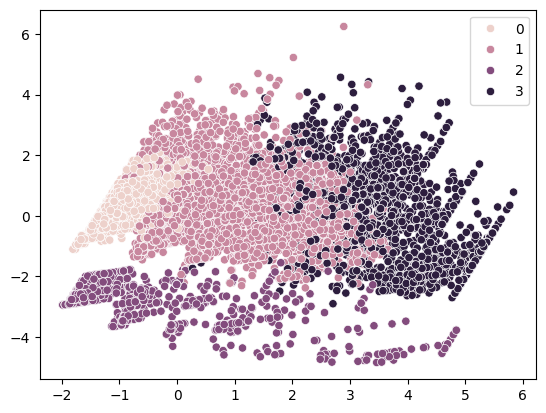

In [ ]:
pca=PCA(n_components=2)
pca_data=pca.fit_transform(s_ds)
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=labels)
plt.show()

In [ ]:
silhouette_score(s_ds,labels)

0.2818439014351198

In [ ]:
np.round(data["labels"].value_counts()/data.shape[0],2)

,count
labels,
2,0.50
0,0.23
1,0.20
3,0.07


**Comparison of avg salary between Data Scientist and other job roles**

In [ ]:
data_f[data_f['job_position_c'] != 'Data Scientist']['ctc'].mean()

1475649.7492521626

In [ ]:
data_f[data_f['job_position_c'] == 'Data Scientist']['ctc'].mean()

1569262.7042745582

## **Insights**

* **What percentage of users fall into the largest cluster?**
    - 50% percentage of the users belong to Cluster 2

* The primary clusters are differentiated by significant variations in CTC (salary), job position, designation level, and whether or not a salary increment is present, with Cluster 1 standing out due to its higher CTC and designation.

* **Is it always true that with an increase in years of experience, the CTC increases? Provide a case where this isn't true.**
    - No, it's not always true that an increase in years of experience (YoE) leads to a higher CTC.
    - Cluster 0 has 8 years of experience with a CTC of ₹940,000.
    - Cluster 3 has 5 years of experience with a CTC of ₹750,000.

* **Name a job position that is commonly considered entry-level but has a few learners with unusually high CTCs in the dataset**
    - FrontEnd Engineer

*  **What is the average CTC of learners across different job positions?**
    - 2.271685e+06

* **How does the average CTC of a Data Scientist compare with other roles?**
    - In general the avgerage salary of a Data Scientist is greater when compared to other roles


#### **Insights from Manual Clustering**

**CTC Categorization (Designation)**
* High Earners: Learners whose CTC is significantly higher than the average in their company and job position.
* Average Earners: Learners whose CTC is close to the average for their peers.
* Low Earners: Learners earning below the average CTC for their peers in the same role.

**Class**
* Class 1 (High earners): Employees who are top earners compared to others in the same job position within the company.
* Class 2 (Average earners): Employees earning near the average CTC for their job position.
* Class 3 (Low earners): Employees earning below the average for their role.

**Tier**
* Tier 1 (High earners): Employees whose CTC is significantly higher than the average CTC within their company.
* Tier 2 (Average earners): Employees with a CTC close to the company average.
* Tier 3 (Low earners): Employees with a CTC below the company's average, indicating they might be in lower-paying roles or newer employees.

**Summary**
* **Designation Flag**: Highlights top earners within specific job positions and experience levels, helping identify the highest-paid learners relative to their peers.
* **Class Flag**: Broader view of high vs. low earners across different job positions within companies, providing insights into which job roles typically pay more.
* **Tier Flag**: Offers a company-wide perspective on learners' earnings, which can be useful for understanding company-wide salary structures.

### **Insights from Clustering**

* Checking Clustering Tendency
  * Calculation for hopkins score was done to determine clustering tendency and score obtained was 1 which states that the data has a high tendency to form clusters.

* Elbow Method to Determine Optimal Number of Clusters for K-means
  * Post plotting the elbow graph the optimal value of k obtained was 4
* K- Means - Based on the Elbow method, we determined an optimal number of clusters and performed clustering, segmenting learners into distinct groups.
* Hierarchical Clustering -  Provides a hierarchical view of the clusters, which is useful for visualizing nested groupings in the data.

### **Recommendations**

* Personalized advice on salary negotiations and career advancements can be provided based on cluster flags.
* High-paying companies can be highlighted, and targeted employer lists can be created to recommend job transitions for learners currently in low-paying companies.
* Role-specific learning paths should be offered, including tailored learning modules and job transition guidance aligned with the learner's role and cluster.
* Program customization can be achieved by differentiating learning paths and communication based on the learner's cluster.
* Additionally, tools can be implemented to allow learners to track their career growth within hierarchical clusters, enabling them to benchmark salary and experience progress.